In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_path = "/home/maksim/Documents/data_art.csv"
data = pd.read_csv(data_path)

In [5]:
data = data[pd.notna(data.Image)]

In [6]:
data.reset_index(drop=True, inplace=True)

In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import WebDriverException
import re

def download_images(data, path_to_save, driver_path):
    driver = webdriver.Firefox(executable_path=driver_path)
    driver.maximize_window()
    paths = []
    for url in data.Image:
        try:
            driver.get(url)
            WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.TAG_NAME, "img")))
            row = data[data.Image == url]
            suffix = str(row.Author.values[0]) + "," + str(row.Art.values[0]) + "," + str(row.year.values[0])
            if len(suffix) > 100:
                suffix = suffix[:100]
            filename = path_to_save + re.escape(suffix.replace("/",";"))
            with open(filename, 'wb') as file:
                file.write(driver.find_element_by_tag_name('img').screenshot_as_png)
            paths.append(filename)
        except WebDriverException:
            paths.append("None")
            continue
    driver.close()
    return paths

In [327]:
paths = download_images(data, path_to_save="/home/maksim/Art_Images/", driver_path="/home/maksim/geckodriver")

In [340]:
import pickle
data.to_pickle("/home/maksim/Documents/data_with_paths_2.pkl")

In [13]:
import pickle
unpickled_df = pd.read_pickle("/home/maksim/Documents/data_with_paths.pkl")

In [14]:
df = unpickled_df.drop_duplicates(subset=['Paths'])
df = df[(pd.notna(df.Paths)) & (df.Paths != "None")]

In [15]:
df.reset_index(drop=True, inplace=True)

In [23]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt


def print_image(path):
    image = cv2.imread(path)
    plt.imshow(image)
    plt.show()

In [17]:
def crop(image):
    image = image[1: image.shape[1] - 1, 1 : image.shape[0] - 1]
    height, width = image.shape[:2]
    u, d, l, r = 0, 0, 0, 0
    while(np.mean(image[:, l]) > 254):
        l += 1
    while(np.mean(image[:, width - r - 1]) > 254):
        r += 1
    while(np.mean(image[u]) > 254):
        u += 1
    while(np.mean(image[height - d - 1]) > 254):
        d += 1
    return image[u:height - d - 1,l: width - r - 1]
    

In [18]:
crop(cv2.imread(df.Paths[17]))

array([[[245, 250, 250],
        [241, 250, 250],
        [237, 249, 250],
        ...,
        [241, 250, 250],
        [238, 250, 250],
        [241, 250, 250]],

       [[180, 191, 191],
        [160, 177, 180],
        [156, 176, 181],
        ...,
        [161, 181, 189],
        [160, 177, 183],
        [168, 181, 184]],

       [[179, 192, 194],
        [158, 180, 185],
        [151, 180, 185],
        ...,
        [156, 180, 194],
        [156, 179, 185],
        [165, 181, 186]],

       ...,

       [[189, 201, 204],
        [170, 192, 198],
        [162, 190, 197],
        ...,
        [176, 195, 207],
        [175, 195, 203],
        [182, 196, 202]],

       [[190, 201, 203],
        [172, 191, 196],
        [165, 189, 195],
        ...,
        [174, 194, 208],
        [177, 195, 202],
        [185, 196, 202]],

       [[192, 200, 200],
        [176, 191, 194],
        [169, 188, 193],
        ...,
        [179, 194, 204],
        [183, 195, 201],
        [187, 196, 200]]

In [19]:
def crop_and_save_image(path):
    image = cv2.imread(path)
    new_image = crop(image)
    filename = "/home/maksim/Art_Images_cropped/" + path[path.rfind("/") + 1:] + ".jpg"
    cv2.imwrite(filename, new_image)
    return filename

In [20]:
paths_cropped = df.Paths.apply(crop_and_save_image)

In [21]:
import pickle
paths_cropped.to_pickle("/home/maksim/Documents/paths_cropped.pkl")

In [22]:
paths_cropped

0        /home/maksim/Art_Images_cropped/alberto\ giaco...
1        /home/maksim/Art_Images_cropped/alberto\ giaco...
2        /home/maksim/Art_Images_cropped/alberto\ giaco...
3        /home/maksim/Art_Images_cropped/alberto\ giaco...
4        /home/maksim/Art_Images_cropped/alberto\ giaco...
                               ...                        
12522    /home/maksim/Art_Images_cropped/zhang\ xiaogan...
12523    /home/maksim/Art_Images_cropped/zhang\ xiaogan...
12524    /home/maksim/Art_Images_cropped/zhang\ xiaogan...
12525    /home/maksim/Art_Images_cropped/zhang\ xiaogan...
12526    /home/maksim/Art_Images_cropped/zhou\ zhimian,...
Name: Paths, Length: 12527, dtype: object

In [31]:
del df['Paths']

In [39]:
df = df.join(paths_cropped)

In [43]:
import pickle
df.to_pickle("/home/maksim/Documents/Art_dataset")

In [9]:
paths = download_images(data[:10], path_to_save="/home/maksim/Downloads/", driver_path="/home/maksim/geckodriver")

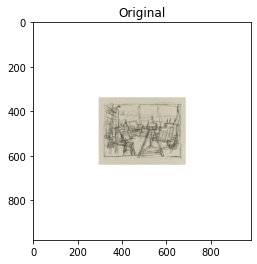

In [42]:
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
# Scaling the image pixels values within 0-1
img = imread(paths[8]) / 255
plt.imshow(img)
plt.title('Original')
plt.show()

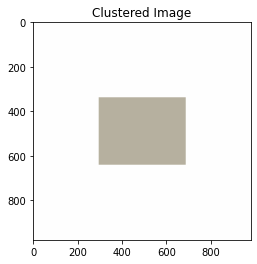

In [43]:
# For clustering the image using k-means, we first need to convert it into a 2-dimensional array
image_2D = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
# tweak the cluster size and see what happens to the Output
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2D)
clustered = kmeans.cluster_centers_[kmeans.labels_]
# Reshape back the image from 2D to 3D image
clustered_3D = clustered.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(clustered_3D)
plt.title('Clustered Image')
plt.show()

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [45]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

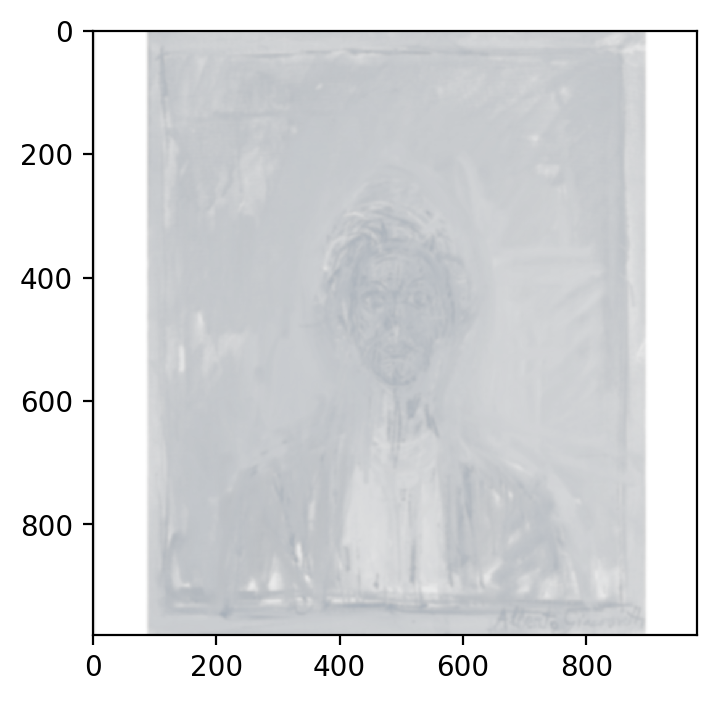

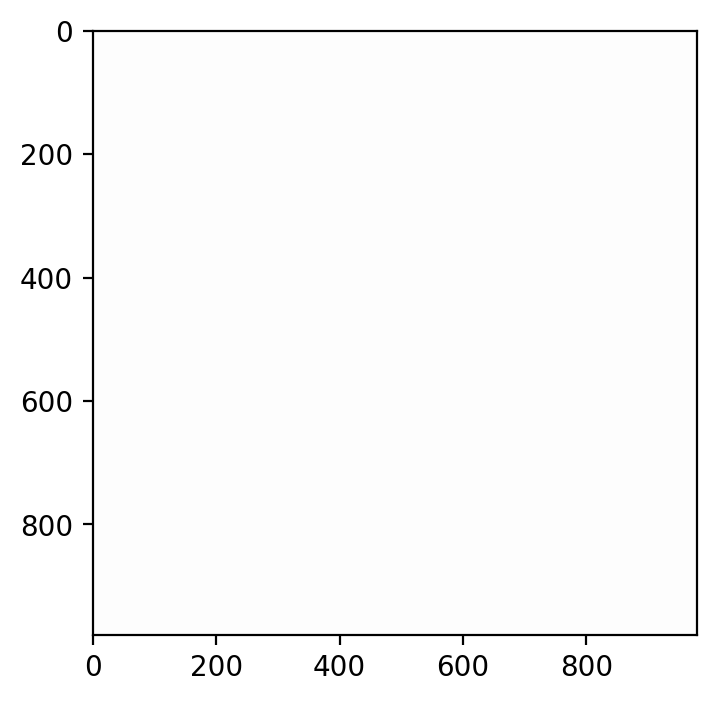

In [136]:
from skimage import io as skio
from skimage import filters
from skimage.segmentation import watershed


url = 'http://i.stack.imgur.com/SYxmp.jpg'
img = skio.imread(paths[0])
sobel = filters.sobel(img)
blurred = filters.gaussian(sobel, sigma=2.0)

seed_mask = np.zeros(img.shape, dtype=np.int64)
seed_mask[2, 2] = 1 # background
seed_mask[500, 400] = 2 # foreground

ws = watershed(blurred, seed_mask)
plt.imshow(blurred)
plt.show()
plt.imshow(ws)
plt.show()

In [150]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte


image = img_as_ubyte(image)

# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral)
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

ValueError: Image dimensions and neighborhood dimensionsdo not match